In [166]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [167]:
df=pd.read_csv('HR Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**EDA**

In [168]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [169]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [170]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [171]:
df.shape

(1470, 35)

**The DataSet Is Highly Imbalance**


In [172]:
x = df['Attrition'].value_counts()
x

Attrition
No     1233
Yes     237
Name: count, dtype: int64

**Some visualizations for gaining insights from the provided data**

In [173]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=['No','Yes'],values=x))
fig.update_layout(title="The Attrition Pie Chart")
fig.show()

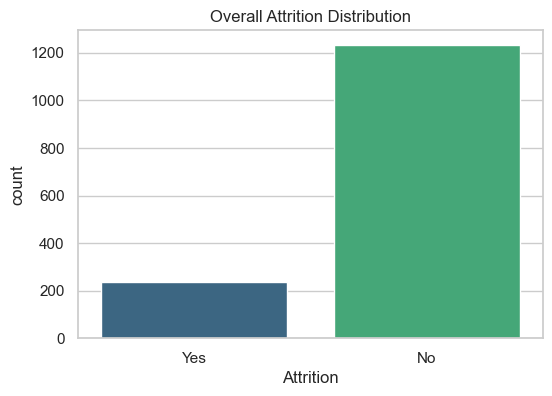

In [174]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Overall Attrition Distribution')
plt.show()

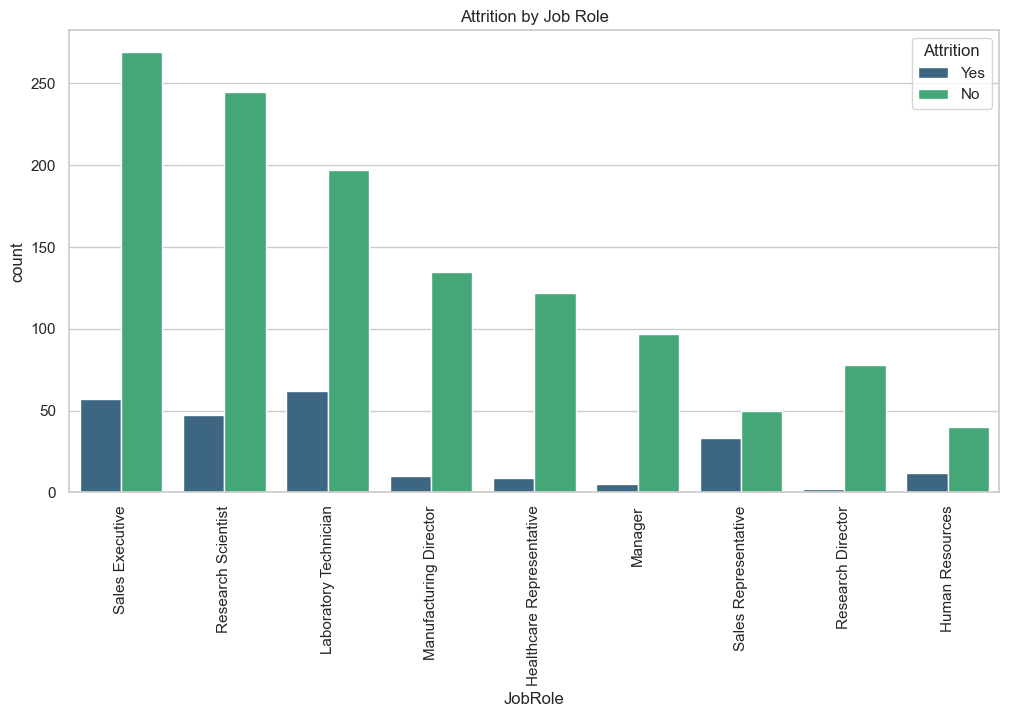

In [175]:
# Countplot for Attrition by Job Role
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)
plt.show()

In [176]:
# Years at Company attrition
u = pd.DataFrame()
u['Yes'] = df[df['Attrition'] == 'Yes']['YearsAtCompany'].value_counts()
u['No'] = df[df['Attrition'] == 'No']['YearsAtCompany'].value_counts()
u

,Yes,No
YearsAtCompany,,
1,59,112.0
2,27,100.0
5,21,175.0
3,20,108.0
4,19,91.0
10,18,102.0
0,16,28.0
7,11,79.0
8,9,71.0


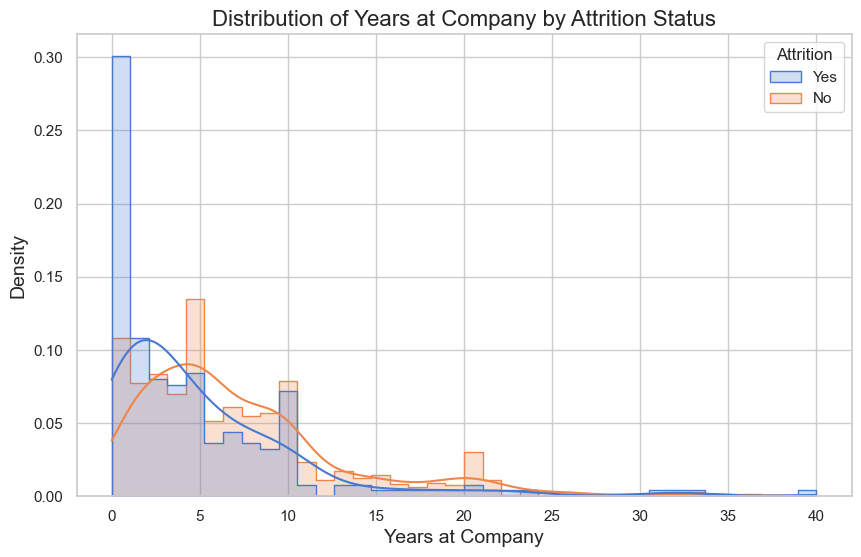

In [177]:
# Distribution of Years at Company by Attrition Status
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', element='step', stat='density', common_norm=False, palette='muted', kde=True)
plt.title('Distribution of Years at Company by Attrition Status', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

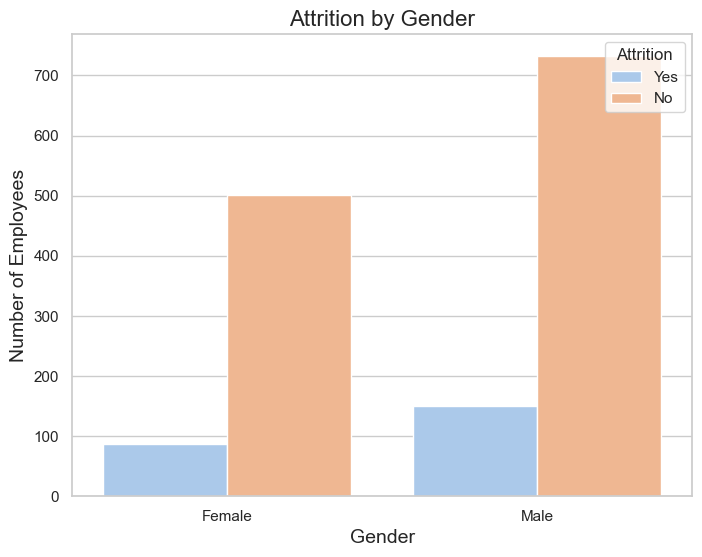

This graph shows that while both male and female employees experience attrition,
 there are more male employees in both categories, suggesting a potential gender imbalance in the workforce.
 Additionally, the number of employees staying is significantly higher than those leaving for both genders


In [178]:
# Attrition by Gender
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.countplot(x='Gender', hue='Attrition', data=df, palette='pastel')
plt.title('Attrition by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.show()
print("This graph shows that while both male and female employees experience attrition,\n there are more male employees in both categories, suggesting a potential gender imbalance in the workforce.\n Additionally, the number of employees staying is significantly higher than those leaving for both genders")

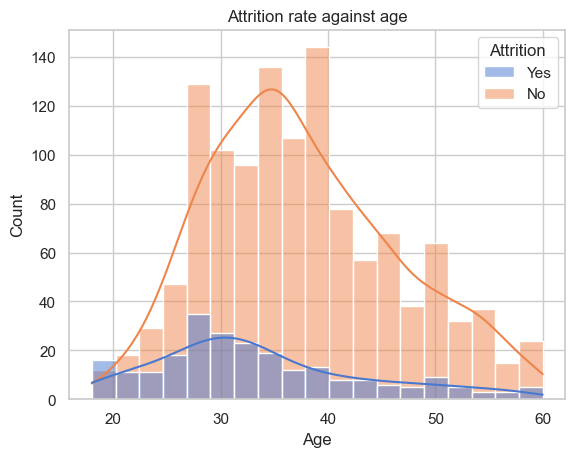

In [179]:
# Attrition rate against age
sns.histplot(data=df, x='Age', hue='Attrition', common_norm=False, palette='muted', kde=True)
plt.title(label='Attrition rate against age')
plt.show()

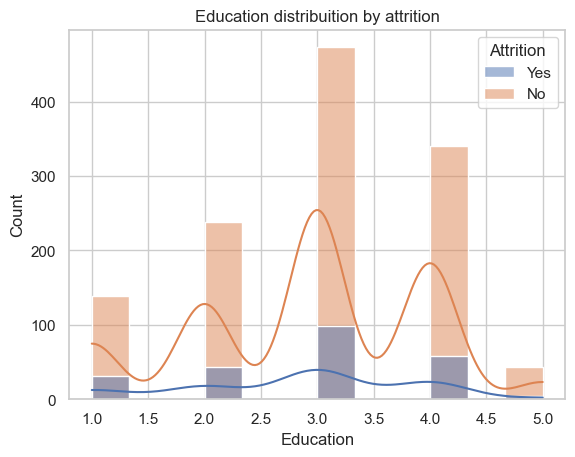

1 Below College 2 College 3 Bachelor 4 Master 5 Doctor


In [180]:
# Education distribuition by attrition
sns.histplot(data=df,x='Education',hue='Attrition',kde=True)
plt.title('Education distribuition by attrition')
plt.show()
print(1, 'Below College', 2, 'College', 3,'Bachelor', 4,'Master', 5, 'Doctor',)

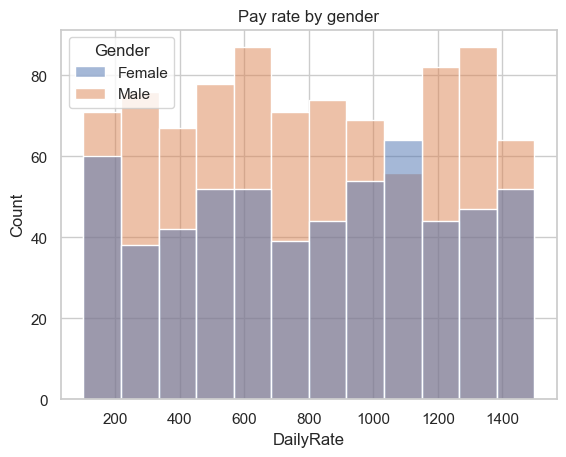

It seems like there is a gender pay gap


In [181]:
# Pay rate by gender
sns.histplot(data=df,x='DailyRate',hue='Gender')
plt.title(label='Pay rate by gender')
plt.show()
print("It seems like there is a gender pay gap")

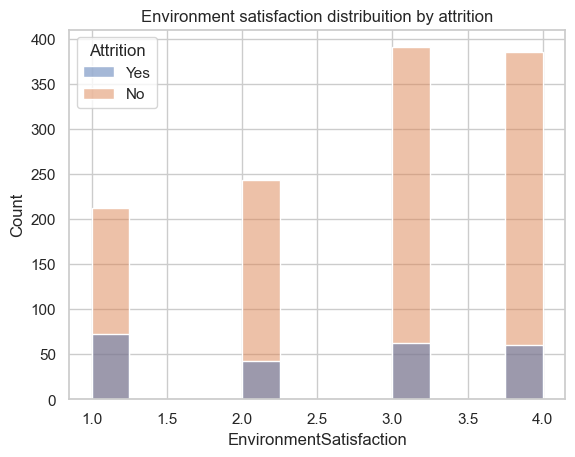

1 Low 2 Medium 3 High 4 Very High


In [182]:
# Environment satisfaction distribuition by attrition
sns.histplot(data=df,x='EnvironmentSatisfaction',hue='Attrition')
plt.title('Environment satisfaction distribuition by attrition')
plt.show()
print(1, 'Low',2, 'Medium',3, 'High',4, 'Very High')

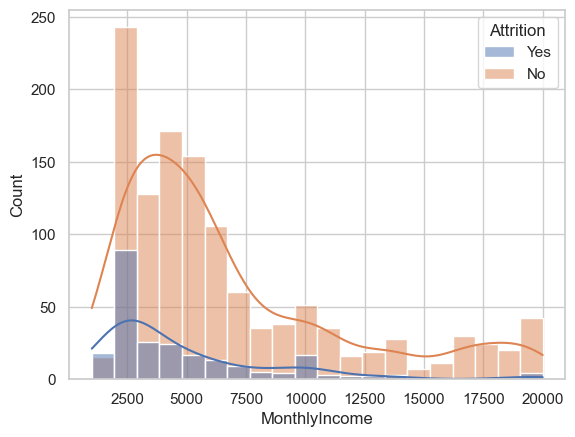

Lower earners seem to leave more for better paying jobs.


In [183]:
sns.histplot(data=df,x='MonthlyIncome',hue='Attrition',kde=True)
plt.show()
print("Lower earners seem to leave more for better paying jobs.")

**Data Pre-Processing And Handling Imbalance in The Dataset**

In [184]:
def Information (df) :
    df.replace('?' , np.nan , inplace = True )
    nulls = (df.shape[0] - df.dropna(axis = 0).shape[0])
    nulls_per = (df.shape[0] - df.dropna(axis = 0).shape[0]) / df.shape[0]
    dup , dup_per = df.duplicated().sum() , (df.duplicated().sum()) / df.shape[0]
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)
    categorical_columns = list(df.select_dtypes(include = ['object']).columns)
    numerical_col_dict = {}
    for col in numerical_columns :
        if df[col].nunique() > 10 :
            numerical_col_dict[col] = 'Continuous'

        else :
            numerical_col_dict[col] = 'Discrete'
    categorical_col_dict = {}
    for col in categorical_columns :
        if df[col].nunique() > 10 :
            categorical_col_dict[col] = 'Continuous'

        else :
            categorical_col_dict[col] = 'Classes'
    x = []
    for col in df.columns :
        x.append([col , df[col].unique() ,df[col].nunique(),df[col].dtype,df[col].isna().sum(),int((df[col].isna().sum())/df.shape[0] * 100)  ])

    x = pd.DataFrame(x ,columns=['Feature','Unique_Values','No.OfUniqueValues','DataType','NoOfNulls','Nulls %'])

    print('\n','There is : {}  Nulls, Representing {} % of The Data'.format(nulls , '%.2f'%nulls_per ))
    print('\n','There is : {}  Duplicated, Representing {} % of The Data'.format(dup , '%.2f'%dup_per))
    print('\n','Numerical Columns : {}'.format(numerical_col_dict))
    print('\n','Categorical Columns : {}'.format(categorical_col_dict))

    return x
Information(df)


 There is : 0  Nulls, Representing 0.00 % of The Data

 There is : 0  Duplicated, Representing 0.00 % of The Data

 Numerical Columns : {'Age': 'Continuous', 'DailyRate': 'Continuous', 'DistanceFromHome': 'Continuous', 'Education': 'Discrete', 'EmployeeCount': 'Discrete', 'EmployeeNumber': 'Continuous', 'EnvironmentSatisfaction': 'Discrete', 'HourlyRate': 'Continuous', 'JobInvolvement': 'Discrete', 'JobLevel': 'Discrete', 'JobSatisfaction': 'Discrete', 'MonthlyIncome': 'Continuous', 'MonthlyRate': 'Continuous', 'NumCompaniesWorked': 'Discrete', 'PercentSalaryHike': 'Continuous', 'PerformanceRating': 'Discrete', 'RelationshipSatisfaction': 'Discrete', 'StandardHours': 'Discrete', 'StockOptionLevel': 'Discrete', 'TotalWorkingYears': 'Continuous', 'TrainingTimesLastYear': 'Discrete', 'WorkLifeBalance': 'Discrete', 'YearsAtCompany': 'Continuous', 'YearsInCurrentRole': 'Continuous', 'YearsSinceLastPromotion': 'Continuous', 'YearsWithCurrManager': 'Continuous'}

 Categorical Columns : {'Att

,Feature,Unique_Values,No.OfUniqueValues,DataType,NoOfNulls,Nulls %
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",43,int64,0,0
1,Attrition,"[Yes, No]",2,object,0,0
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3,object,0,0
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",886,int64,0,0
4,Department,"[Sales, Research & Development, Human Resources]",3,object,0,0
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",29,int64,0,0
6,Education,"[2, 1, 4, 3, 5]",5,int64,0,0
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...",6,object,0,0
8,EmployeeCount,[1],1,int64,0,0
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1470,int64,0,0


In [185]:
df.drop('Over18',axis='columns',inplace=True)
df.drop('EmployeeCount',axis='columns',inplace=True)
df.drop('StandardHours',axis='columns',inplace=True)

In [186]:
columns_with_yes_no = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]

print("Columns with both 'Yes' and 'No':", columns_with_yes_no)

Columns with both 'Yes' and 'No': ['Attrition', 'OverTime']


In [187]:
df['Attrition'] = df['Attrition'].replace({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].replace({'Female':1, 'Male':0})
df['OverTime'] = df['OverTime'].replace({'Yes':1, 'No':0})

In [188]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [189]:
def information(df):
    df.replace('?' , np.nan , inplace = True )
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)
    categorical_columns = list(df.select_dtypes(include = ['object']).columns)
    numerical_col_dict = {}
    for col in numerical_columns :
        if df[col].nunique() > 10 :
            numerical_col_dict[col] = 'Continuous'
        else :
            numerical_col_dict[col] = 'Discrete'
    categorical_col_dict = {}
    for col in categorical_columns :
        if df[col].nunique() > 10 :
            categorical_col_dict[col] = 'Continuous'
        else :
            categorical_col_dict[col] = 'Classes'

    print('Continuous Numerical Columns:')
    for col, dtype in numerical_col_dict.items():
        if dtype == 'Continuous':
            print(col)

    print('\nDiscrete Numerical Columns:')
    for col, dtype in numerical_col_dict.items():
        if dtype == 'Discrete':
            print(col)

    print('\nCategorical Columns with Classes:')
    for col, dtype in categorical_col_dict.items():
        if dtype == 'Classes':
            print(col)

information(df)

Continuous Numerical Columns:
Age
DailyRate
DistanceFromHome
EmployeeNumber
HourlyRate
MonthlyIncome
MonthlyRate
PercentSalaryHike
TotalWorkingYears
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

Discrete Numerical Columns:
Attrition
Education
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobSatisfaction
NumCompaniesWorked
OverTime
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance

Categorical Columns with Classes:
BusinessTravel
Department
EducationField
JobRole
MaritalStatus


Standardization:<br>
Age, DailyRate,  DistanceFromHome, Education, EmployeeNumber, 	EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel,  JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance	, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

OneHotEncoding:<br>
BusinessTravel, Department, EducationField, JobRole, MaritalStatus 


In [190]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
                
print_unique_col_values(df)  

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']


In [191]:
df.shape

(1470, 32)

**One-Hot Encoding**<br>
It is basically used to convert categorical data into a numerical format that machine learning algorithms can understand.

In [192]:
df = pd.get_dummies(data=df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
dummy_columns = df.select_dtypes(include='bool').columns
df[dummy_columns] = df[dummy_columns].astype('uint8')
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
      

In [193]:
df.shape

(1470, 51)

In [194]:
df.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtComp

In [195]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,1,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,0,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,0,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,1,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,0,40,3,...,1,0,0,0,0,0,0,0,1,0


**Normalization Of the Numerical Columns**

In [196]:
cols_to_scale = ['Age', 'DailyRate',  'DistanceFromHome', 'Education', 'EmployeeNumber','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',  'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance'	, 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [197]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age: [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition: [1 0]
DailyRate: [7.15819613e-01 1.26700072e-01 9.09806729e-01 9.23407301e-01
 3.50035791e-01 6.46385111e-01 8.74731568e-01 8.99069435e-01
 8.16034359e-02 8.56836077e-01 5.06084467e-01 3.65068003e-02
 4.06585540e-01 8.90479599e-01 7.15819613e-04 9.21259843e-01
 1.66070150e-01 7.30851825e-01 7.99570508e-01 1.92555476e-01
 4.08732999e-01 7.98854689e-01 2.26914817e-01 2.06871868e-01
 4.27344309e-01 8.44667144e-01 7.32283465e-01 4.21617752e-01
 2.68432355e-01 4.31639227e-01 5.88403722e-01 9.71367215e-01
 1.6463

In [198]:
df.dtypes

Age                                  float64
Attrition                              int64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeNumber                       float64
EnvironmentSatisfaction              float64
Gender                                 int64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
OverTime                               int64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBa

In [199]:
df.shape

(1470, 51)

**Split (Train & Test)**

In [200]:
X = df.drop('Attrition',axis='columns')
y = df['Attrition']

In [201]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

**Handling Our Imbalance dataset by SMOTE method (Synthetic Minority Oversampling Technique)**<br>
SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address the problem of imbalanced datasets in machine learning.<br>Also it generates synthetic samples by creating new data points that lie along the line segments between existing data points in the minority class. This approach avoids simply duplicating minority class samples and instead introduces more diversity to the dataset.

In [202]:
#Handling Our Imbalance dataset by SMOTE method (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.30,random_state=15,stratify=y_sm)

In [204]:
y_train.value_counts()

Attrition
0    863
1    863
Name: count, dtype: int64

In [205]:
y_test.value_counts()

Attrition
0    370
1    370
Name: count, dtype: int64

In [206]:
X_train.shape

(1726, 50)

In [207]:
X_test.shape

(740, 50)

In [208]:
X_train[:10]

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
643,0.571429,0.832498,0.071429,0.500000,0.432027,0.666667,1,0.928571,1.000000,0.250000,...,1,0,0,0,0,0,0,0,1,0
77,0.642857,0.065140,0.178571,0.750000,0.048379,1.000000,0,0.314286,0.666667,0.500000,...,0,0,0,1,0,0,0,0,1,0
1492,0.245506,0.679279,0.254967,0.206954,0.378199,0.862031,0,0.182309,0.666667,0.000000,...,1,0,0,0,0,0,0,0,1,0
932,0.261905,0.503937,0.214286,0.500000,0.627963,0.333333,1,0.128571,0.666667,0.000000,...,1,0,0,0,0,0,0,1,0,0
83,0.476190,0.337151,0.178571,0.500000,0.051282,0.333333,1,0.700000,0.000000,0.250000,...,0,0,0,0,1,0,0,1,0,0
599,0.428571,0.672155,0.428571,0.500000,0.400581,0.666667,0,0.085714,0.666667,0.000000,...,0,0,0,0,0,0,0,0,1,0
1870,0.117135,0.506165,0.619764,0.148595,0.520635,0.567604,0,0.597303,0.198126,0.000000,...,0,0,0,0,0,0,1,0,0,1
1686,0.269754,0.110974,0.349033,0.572161,0.232437,0.762882,0,0.273930,0.333333,0.322161,...,0,0,0,0,0,1,0,0,0,1
2065,0.563133,0.574424,0.071429,0.500000,0.596874,0.000000,0,0.846389,0.666667,0.000000,...,1,0,0,0,0,0,0,0,1,0
10,0.404762,0.506084,0.535714,0.500000,0.006289,0.000000,0,0.771429,1.000000,0.000000,...,1,0,0,0,0,0,0,0,1,0


In [209]:
len(X_train.columns)

50

**Model**<br>
*) Its a feedforward neural network for binary classification.<br>
*) 3 hidden layers with ReLU activation functions and an output layer with a sigmoid activation function.<br>
*) Early stopping is employed to prevent overfitting, and the Adam optimizer is used for optimization.

In [210]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(65, input_shape=(50,), activation='relu'),
    keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Add EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',                                 # Monitor the validation loss
    patience=3,                                         # Stop training after 3 epochs of no improvement
    restore_best_weights=True                           # Restore model weights from the epoch with the best loss
)



model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),  
          epochs=50, 
          callbacks=[early_stopping])

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6015 - loss: 0.6639 - val_accuracy: 0.7284 - val_loss: 0.5758
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5486 - val_accuracy: 0.7838 - val_loss: 0.4941
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4712 - val_accuracy: 0.8351 - val_loss: 0.4127
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.3852 - val_accuracy: 0.8541 - val_loss: 0.3836
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.3703 - val_accuracy: 0.8527 - val_loss: 0.3671
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3437 - val_accuracy: 0.8500 - val_loss: 0.3564
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8868 - loss: 0.2891 - val_accuracy: 0.8730 - val_loss: 0.3245
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2536 - val_accuracy: 0.8730 - val_loss:

In [211]:
model.evaluate(X_test, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9150 - loss: 0.2280 


[0.2670019268989563, 0.8972973227500916]

In [212]:
y_pred= model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [213]:
y_predicted = []
for element in y_pred:
    if element > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

y_predicted[:10]

[0, 1, 1, 0, 0, 0, 1, 0, 1, 0]

In [214]:
y_test[:10]

1126    0
2363    1
709     1
641     0
290     0
338     0
1554    1
1208    0
2184    1
834     0
Name: Attrition, dtype: int64

**Classification Report**

In [215]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       370
           1       0.89      0.91      0.90       370

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



Text(92.25, 0.5, 'Truth')

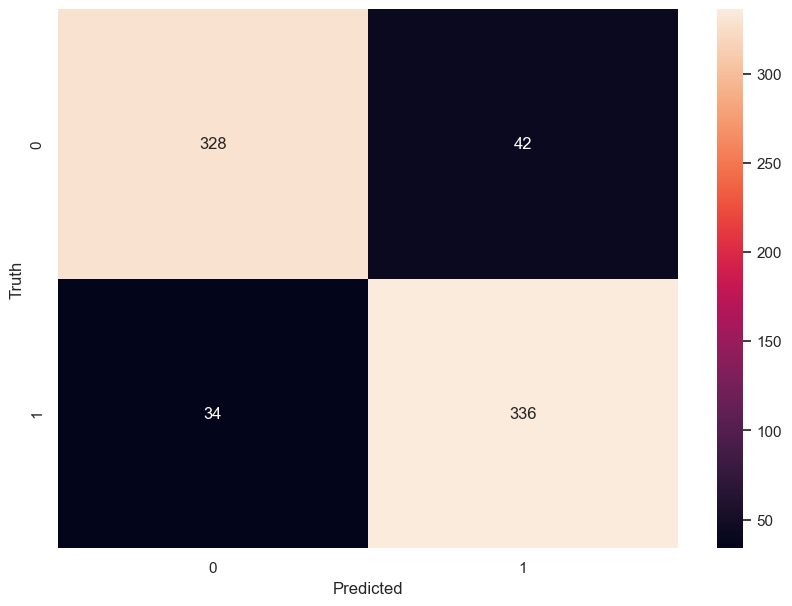

In [216]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')